# AGENDA





*   PCA from scratch / sklearn on simulated dataset
*   PCA for noise reduction
*   PCA on Faces Dataset


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Excercise 1: PCA from scratch / sklearn


Implement PCA algorithm from scratch

[Face Dataset](https://drive.google.com/drive/folders/1T0G15ucwKPB97bVy3ZdO4JAWTyOuk7S8?usp=sharing)




In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1612)

In [ ]:
X_0, y_0 = np.random.randint(20, 65, size=(10, 4)), np.zeros(10)
print('X_0: ', X_0)
print('y_0: ', y_0)
X_1, y_1 = np.random.randint(50, 90, size=(10, 4)), np.ones(10)
print('X_1: ', X_1)
print('y_1: ', y_1)

X_0:  [[56 58 24 61]
 [33 41 50 26]
 [64 63 28 63]
 [49 32 55 60]
 [45 25 51 42]
 [29 42 41 42]
 [29 24 42 29]
 [47 41 53 48]
 [56 37 32 59]
 [34 46 62 25]]
y_0:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
X_1:  [[55 80 73 72]
 [69 56 60 70]
 [58 85 69 57]
 [82 66 80 54]
 [50 64 53 53]
 [84 84 80 68]
 [62 73 85 64]
 [62 50 77 65]
 [80 52 54 72]
 [88 84 76 86]]
y_1:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
def generate_data():
  X_0, y_0 = np.random.randint(20, 65, size=(10, 4)), np.zeros(10)
  X_1, y_1 = np.random.randint(50, 90, size=(10, 4)), np.ones(10)
  X = np.concatenate((X_0, X_1), axis=0)
  y = np.concatenate((y_0, y_1), axis=0)
  return X, y

In [ ]:
X, y = generate_data()
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)
print('X: ', X)
print('y: ', y)

Shape of X:  (20, 4)
Shape of y:  (20,)
X:  [[30 54 29 39]
 [34 20 48 27]
 [48 29 53 58]
 [61 22 53 59]
 [46 47 27 26]
 [20 21 26 48]
 [62 32 49 23]
 [20 33 31 57]
 [35 60 64 41]
 [54 37 42 33]
 [50 66 56 58]
 [60 65 84 69]
 [86 83 73 85]
 [88 54 60 52]
 [70 74 79 69]
 [58 58 63 77]
 [68 89 66 65]
 [81 50 59 76]
 [72 80 57 80]
 [89 67 62 58]]
y:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Before applying PCA, we need to zero centered data

In [ ]:
# TODO:
# 1. X = X - mean
X = X - np.mean(X, axis=0) # !!!
print('X: ', X)

X:  [[-26.6    1.95 -25.05 -16.  ]
 [-22.6  -32.05  -6.05 -28.  ]
 [ -8.6  -23.05  -1.05   3.  ]
 [  4.4  -30.05  -1.05   4.  ]
 [-10.6   -5.05 -27.05 -29.  ]
 [-36.6  -31.05 -28.05  -7.  ]
 [  5.4  -20.05  -5.05 -32.  ]
 [-36.6  -19.05 -23.05   2.  ]
 [-21.6    7.95   9.95 -14.  ]
 [ -2.6  -15.05 -12.05 -22.  ]
 [ -6.6   13.95   1.95   3.  ]
 [  3.4   12.95  29.95  14.  ]
 [ 29.4   30.95  18.95  30.  ]
 [ 31.4    1.95   5.95  -3.  ]
 [ 13.4   21.95  24.95  14.  ]
 [  1.4    5.95   8.95  22.  ]
 [ 11.4   36.95  11.95  10.  ]
 [ 24.4   -2.05   4.95  21.  ]
 [ 15.4   27.95   2.95  25.  ]
 [ 32.4   14.95   7.95   3.  ]]


Use np.cov to find the Covariance Matrix of X

In [ ]:
# TODO
cov_mat = np.cov(X.T) # PCA: feature cùng size. Tạm hiểu. Phải transpose.
print('Shape of Covariance Matrix: ', cov_mat.shape)
print(cov_mat)

Shape of Covariance Matrix:  (4, 4)
[[458.14736842 257.70526316 236.49473684 203.68421053]
 [257.70526316 459.20789474 223.99736842 237.78947368]
 [236.49473684 223.99736842 274.89210526 190.94736842]
 [203.68421053 237.78947368 190.94736842 349.05263158]]


Use np.linalg.eig to find Eigenvectors and Eigenvalues

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat) # Trị riêng, Vector riêng tính trọng số alpha và U
# X ban đầu (20,4) 20 samples, input 4 --> lấy ra 4 input làm 4 samples, và 4-k = 4-2 = 2 features cho U_reduced --> z=(20,2)
print('Shape of Eigenvectors: ', eig_vecs.shape) # U = (4,4) có k=2 --> U_reduced = (4,2) --> reduce dựa trên số k
print('Shape of Eigenvalues: ', eig_vals.shape) # alpha
print('Eigenvectors: ', eig_vecs)
print('Eigenvalues: ', eig_vals)

Shape of Eigenvectors:  (4, 4)
Shape of Eigenvalues:  (4,)
Eigenvectors:  [[ 0.5481056   0.32790899 -0.76772868 -0.05146462]
 [ 0.56027677  0.13040767  0.49913903 -0.64803087]
 [ 0.42726731 -0.8914513  -0.08410823  0.12523194]
 [ 0.45068041  0.28422548  0.39291056  0.74948272]]
Eigenvalues:  [1073.41060109   94.25202619  212.26717542  161.37019729]


**Confirm PCA theory**

Orthonormal basis

In [ ]:
# 1. U_i dot U_i = 0

In [ ]:
print(np.dot(eig_vecs[:,0], eig_vecs[:,1]))
print(np.dot(eig_vecs[:,0], eig_vecs[:,2]))
print(np.dot(eig_vecs[:,0], eig_vecs[:,3]))
print(np.dot(eig_vecs[:,1], eig_vecs[:,2]))
print(np.dot(eig_vecs[:,1], eig_vecs[:,3]))
print(np.dot(eig_vecs[:,2], eig_vecs[:,3]))

-1.3877787807814457e-16
3.3306690738754696e-16
-6.591949208711867e-17
3.885780586188048e-16
3.0531133177191805e-16
6.661338147750939e-16


Use np.linalg.norm to calculate norm of each Eigen Vectors (result must be 1)



In [ ]:
# 1. Print out the norm of 4 eigen vectors
from numpy.linalg import norm
print(norm(eig_vecs[:,0]))
print(norm(eig_vecs[:,1]))
print(norm(eig_vecs[:,2]))
print(norm(eig_vecs[:,3]))

1.0
0.9999999999999999
1.0
0.9999999999999999


**Information Retained**

Calculate the percentage retained from each Eigenvalue

In [ ]:
# Method 1:
summ = sum(eig_vals)
print(sum(eig_vals))
lst = []
for i in range(0,4):
  lst.append(eig_vals[i]*100/summ)
lst = sorted(lst, reverse=True)
print(lst)
print(np.sum(lst[0:2]))

1541.3000000000006
[69.64319737179605, 13.771957141383373, 10.469746142538808, 6.11509934428178]
83.41515451317942


In [ ]:
# Method 2:
tot = sum(eig_vals)
print(tot)
info = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
print(info)
print(np.sum(info[0:2]))

1541.3000000000006
[69.64319737179605, 13.771957141383373, 10.469746142538808, 6.115099344281781]
83.41515451317942


**Choosing components and forming a feature vector**

In [ ]:
print('Eigen vectors:\n', eig_vecs)
print('\nEigen values:', eig_vals)

Eigen vectors:
 [[ 0.5481056   0.32790899 -0.76772868 -0.05146462]
 [ 0.56027677  0.13040767  0.49913903 -0.64803087]
 [ 0.42726731 -0.8914513  -0.08410823  0.12523194]
 [ 0.45068041  0.28422548  0.39291056  0.74948272]]

Eigen values: [1073.41060109   94.25202619  212.26717542  161.37019729]


In [ ]:
K = 2
# 2. Get the first K columns
k_eigen_vectors = eig_vecs[:,:K].T
print(k_eigen_vectors)

[[ 0.5481056   0.56027677  0.42726731  0.45068041]
 [ 0.32790899  0.13040767 -0.8914513   0.28422548]]


In [ ]:
# 1. Calculate X_approx using k_eigen_vectors
X_approx = np.dot(X, k_eigen_vectors.T)
print('X: ', X)
print('X shape: ', X.shape)
print('k_eigen_vectors.T: ', k_eigen_vectors.T)
print('X_approx: ', X_approx)
print('X_approx.shape: ', X_approx.shape)

X:  [[-26.6    1.95 -25.05 -16.  ]
 [-22.6  -32.05  -6.05 -28.  ]
 [ -8.6  -23.05  -1.05   3.  ]
 [  4.4  -30.05  -1.05   4.  ]
 [-10.6   -5.05 -27.05 -29.  ]
 [-36.6  -31.05 -28.05  -7.  ]
 [  5.4  -20.05  -5.05 -32.  ]
 [-36.6  -19.05 -23.05   2.  ]
 [-21.6    7.95   9.95 -14.  ]
 [ -2.6  -15.05 -12.05 -22.  ]
 [ -6.6   13.95   1.95   3.  ]
 [  3.4   12.95  29.95  14.  ]
 [ 29.4   30.95  18.95  30.  ]
 [ 31.4    1.95   5.95  -3.  ]
 [ 13.4   21.95  24.95  14.  ]
 [  1.4    5.95   8.95  22.  ]
 [ 11.4   36.95  11.95  10.  ]
 [ 24.4   -2.05   4.95  21.  ]
 [ 15.4   27.95   2.95  25.  ]
 [ 32.4   14.95   7.95   3.  ]]
X shape:  (20, 4)
k_eigen_vectors.T:  [[ 0.5481056   0.32790899]
 [ 0.56027677  0.13040767]
 [ 0.42726731 -0.8914513 ]
 [ 0.45068041  0.28422548]]
X_approx:  [[-31.40100206   9.31516313]
 [-45.54807584 -14.15534206]
 [-16.72467724  -4.03721386]
 [-13.07056137  -0.40302521]
 [-33.2666297   11.73682468]
 [-52.59686984   6.96500323]
 [-24.85325196  -5.43735146]
 [-39.68108835

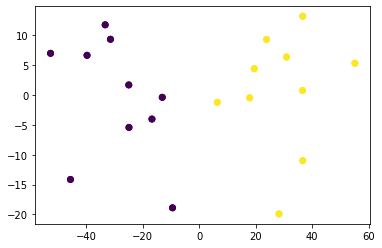

In [ ]:
plt.scatter(X_approx[:,0], X_approx[:,1], c=y) # chỉ có 2 features
plt.scatter(X_approx[:,0], X_approx[:,1], c=y) 
plt.show()

**PCA using sklearn**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # the number of basis I need is 2
X_pca = pca.fit_transform(X)
print('X_pca: ', X_pca)
print('X_pca shape: ', X_pca.shape)
print('PCA explained variance ratio: ', pca.explained_variance_ratio_) # sum of these 2 figures = the above 88% 
print('PCA eigen values: ', pca.explained_variance_)
print('PCA component 0: ', pca.components_[0])
print('PCA component 1: ', pca.components_[1])

X_pca:  [[-31.40100206 -17.21524633]
 [-45.54807584   9.13937832]
 [-16.72467724   3.63564254]
 [-13.07056137  16.71717806]
 [-33.2666297    3.50200659]
 [-52.59686984 -12.20946503]
 [-24.85325196  26.30186363]
 [-39.68108835 -21.31478721]
 [ -9.44309668 -14.21347016]
 [-24.92078005  13.14647586]
 [  6.38357645 -13.04471935]
 [ 28.22532493  -6.8352792 ]
 [ 55.07199864  -3.0705953 ]
 [ 19.49325498  24.81253523]
 [ 36.61253537  -4.07078473]
 [ 17.84000604  -9.78632065]
 [ 36.56327905 -12.61509223]
 [ 23.80447112  11.92102893]
 [ 36.62801083 -11.70255868]
 [ 30.88357568  16.90220969]]
X_pca shape:  (20, 2)
PCA explained variance ratio:  [0.69643197 0.13771957]
PCA eigen values:  [1073.41060109  212.26717542]
PCA component 0:  [0.5481056  0.56027677 0.42726731 0.45068041]
PCA component 1:  [ 0.76772868 -0.49913903  0.08410823 -0.39291056]


# Excercise 2: PCA for noise reduction

Load dataset

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print('Shape of digits data: ', digits.data.shape)

Shape of digits data:  (1797, 64)


64 mean each image is 8x8

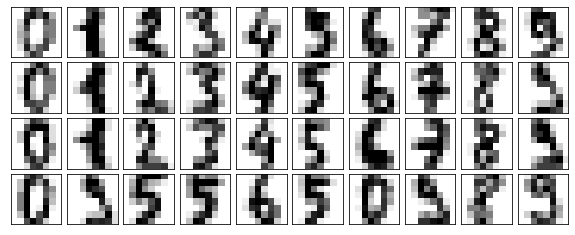

In [ ]:
# Gaussian nois function
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), # reshape from (64,) to (8, 8)
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Add noise to data

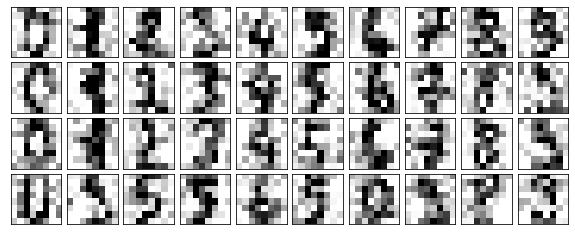

In [ ]:
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Apply PCA to noisy dataset to retain 50% of information

In [ ]:
pca = PCA(0.5).fit(noisy) #the percentage of data I want to keep
print('Number of components chosen: ', pca.n_components_)

Number of components chosen:  12


Plot approximated data

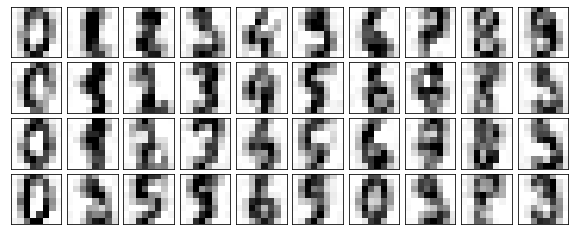

In [ ]:
components = pca.transform(noisy) # trying to reshape them into the original photos
filtered = pca.inverse_transform(components)
plot_digits(filtered) # decensoring noise around numbers (decensored)

# Excercise 3: EigenFaces

In [ ]:
%reset -f

In [ ]:
import os, glob, sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
image_paths = glob.glob("/content/drive/My Drive/Dataset/faces/*.pgm") 
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]

1 subject01 centerlight


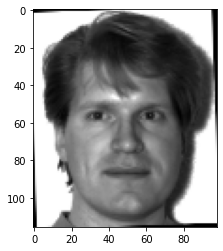

1 subject01 glasses


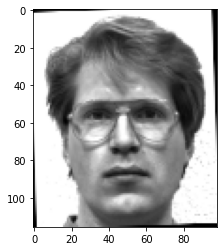

1 subject01 happy


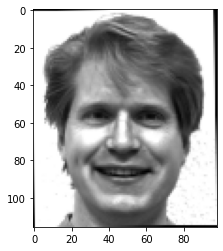

1 subject01 leftlight


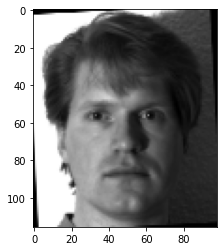

1 subject01 noglasses


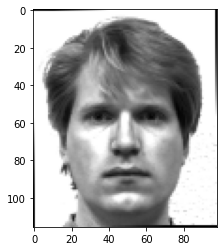

1 subject01 normal


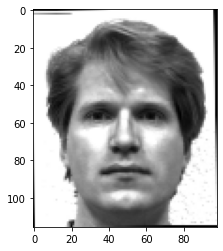

1 subject01 rightlight


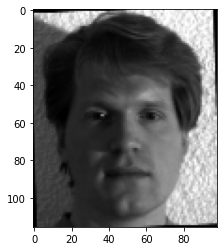

1 subject01 sad


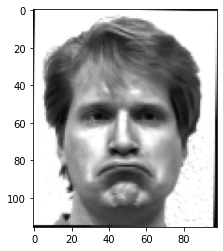

1 subject01 sleepy


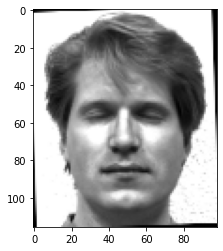

1 subject01 surprised


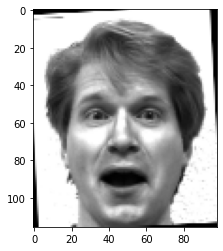

In [ ]:
import os, glob, sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
def parse_image_path(path):
    """Get subject information from image path
    Arguments:
        `path`: str
            Path to the image
    Returns:
        `id`: str
            ID of the subject
        `subject`: str
            Subject name
        `attribute`: str
            Attribute of the subject
    """
    basename = os.path.basename(path)
    basename = os.path.splitext(basename)[0]
    subject, attribute = basename.split(".")
    id = int(subject[-2:])
    return id, subject, attribute
# get all images with path of the form "faces/*.pgm" (regular expression)
image_paths.sort()
n_samples = 10
for path in image_paths[:n_samples]:
    # parse image path
    id, subject, attribute = parse_image_path(path)
    # read image from path
    image = cv2.imread(path)
    # display
    print(id, subject, attribute)
    plt.imshow(image, cmap="gray")
    plt.show()
X = []
metadata = {"id": [], "subject": [], "attribute": []}
for path in image_paths:
    # parse image information
    id, subject, attribute = parse_image_path(path)
    metadata["id"].append(id)
    metadata["subject"].append(subject)
    metadata["attribute"].append(attribute)
    # read image
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    # add to x_train
    X.append(image[None, ...]) # [None, ...] ~ [H, W, C] --> [1, H, W, C]
X = np.concatenate(X, axis=0) # [1, H, W, C] --> [N, H, W, C]
y = metadata['attribute']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def preprocess_data(X, labels):
  X = X.astype(np.float32)
  X = X / 255
  label_enc = LabelEncoder()
  ohe = OneHotEncoder()
  temp = label_enc.fit_transform(labels)
  Y = ohe.fit_transform(temp.reshape(-1,1)).toarray()
  return X, y, Y

X, y, Y = preprocess_data(X, y)
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (165, 116, 98)
Y shape:  (165, 11)


Remember to flatten data using np.reshape

In [ ]:
X_flat = X.reshape(165, -1) # to get the above figures in X shape mulplitled: 116*98=11368
print('X_flat: ', X_flat)
print('X_flat shape: ', X_flat.shape)

X_flat:  [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.99607843 1.         ... 0.45882353 0.03529412 0.        ]
 [1.         1.         1.         ... 0.43529412 0.8627451  0.74509805]
 [0.         0.         0.         ... 0.         0.         0.        ]]
X_flat shape:  (165, 11368)


Implement PCA using sklearn

In [ ]:
from sklearn.decomposition import PCA

pca_face = PCA() # call PCA without parameters
pca_face.fit(X_flat)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca_face.components_.shape)
print(pca_face.components_)

(165, 11368)
[[-5.5702268e-03 -5.6794100e-03 -2.7200538e-03 ... -6.5605496e-03
  -4.5714229e-03 -5.3252452e-03]
 [ 1.2657564e-03  1.6055043e-03  4.5524351e-03 ...  8.8091678e-05
   2.0791841e-04  7.1081746e-04]
 [-1.9009175e-03 -4.5032031e-03 -6.8604103e-03 ... -9.1566780e-04
  -3.2360488e-04 -1.1611001e-03]
 ...
 [-7.6464989e-04  1.3779382e-03 -1.5157266e-03 ... -5.8630067e-03
  -9.7885113e-03 -2.8331890e-03]
 [ 1.5156235e-03  1.8799383e-02  4.0968414e-02 ... -2.9261482e-03
   2.7450884e-03 -3.4546896e-03]
 [-1.5304234e-02  8.9925211e-03 -1.0805932e-02 ...  3.2155809e-03
  -1.0859066e-04 -2.9495622e-03]]


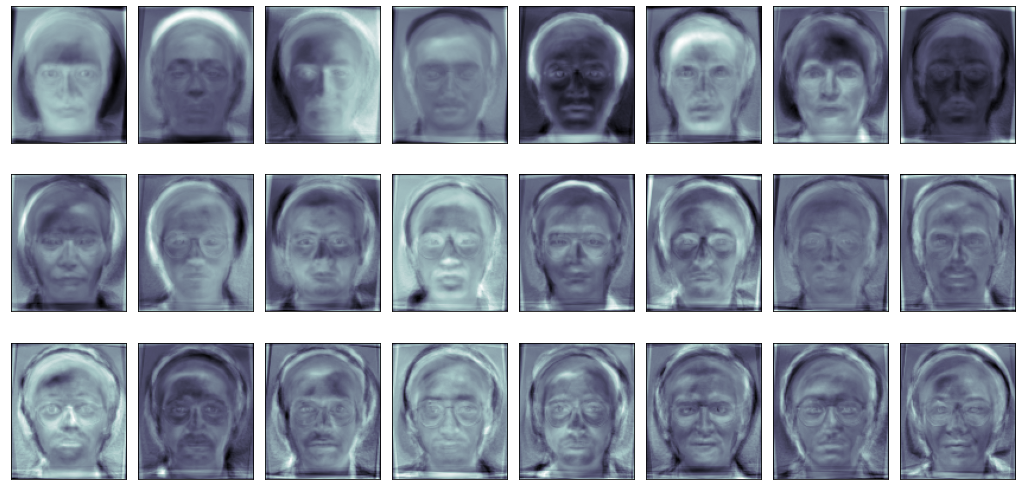

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(18, 9),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_face.components_[i].reshape(116, 98), cmap='bone')

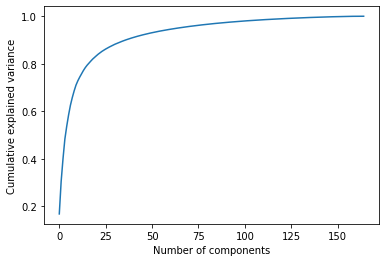

In [ ]:
plt.plot(np.cumsum(pca_face.explained_variance_ratio_)) # getting nearly 150 can keep 100% (chạm 1) or if 80% then take 25 component # gần 150 thì giữ lại đc 100% (chạm 1) or 80% thì lấy 25 components
plt.xlabel('Number of components') s
plt.ylabel('Cumulative explained variance');

In [ ]:
# TODO:
# 1. Define PCA with the number of components you want
# 2. inverse_transform to reconstruct original data (name it projected)
pca_face = PCA(100).fit(X_flat) # PCA giữ lại dimension nào most import nhất và visualize # Để đạt 100% (chạm 1) thì lấy cỡ 100 hình ra là đc
components = pca_face.transform(X_flat)
projected = pca_face.inverse_transform(components) # inverse_transform vì trước đó đã Flatten / Scale rồi mà giờ muốn tính y_pred

print(pca_face)
print('Components: ', components)
print('Projected: ', projected)
# StandardScaler.fit --> get nuy, theta. Transforming is to change X

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
Components:  [[  0.33091897  -9.898892    -4.670013   ...   0.4676912    0.7301749
   -0.28521007]
 [ -5.4770474    5.302499    -4.9655757  ...   0.832456     0.14773658
    0.9321897 ]
 [ -6.089637     3.8407226   -2.2626219  ...  -0.45895344   0.70368147
   -0.9957511 ]
 ...
 [ -5.9394827   -4.6379633   -3.6661646  ...  -0.0423914    0.92029524
    0.11321482]
 [ -9.013629    -5.3951144   -1.0261592  ...  -0.0826042   -0.28136104
    0.02940099]
 [-14.408594    -9.683912    -8.524641   ...   0.6028508    0.5487236
    0.19842692]]
Projected:  [[ 0.02223411  0.01538852  0.01012945 ...  0.05742627  0.1321334
   0.04620504]
 [ 0.03642233 -0.0238618   0.00544077 ... -0.07414478 -0.03154518
  -0.01142149]
 [ 0.06414595  0.03345165  0.09200957 ...  0.02989407 -0.03003952
   0.03062247]
 ...
 [-0.0202684   1.0059102   0.9819774  ...  0.5134234   0.06320705
  -0.05372025]


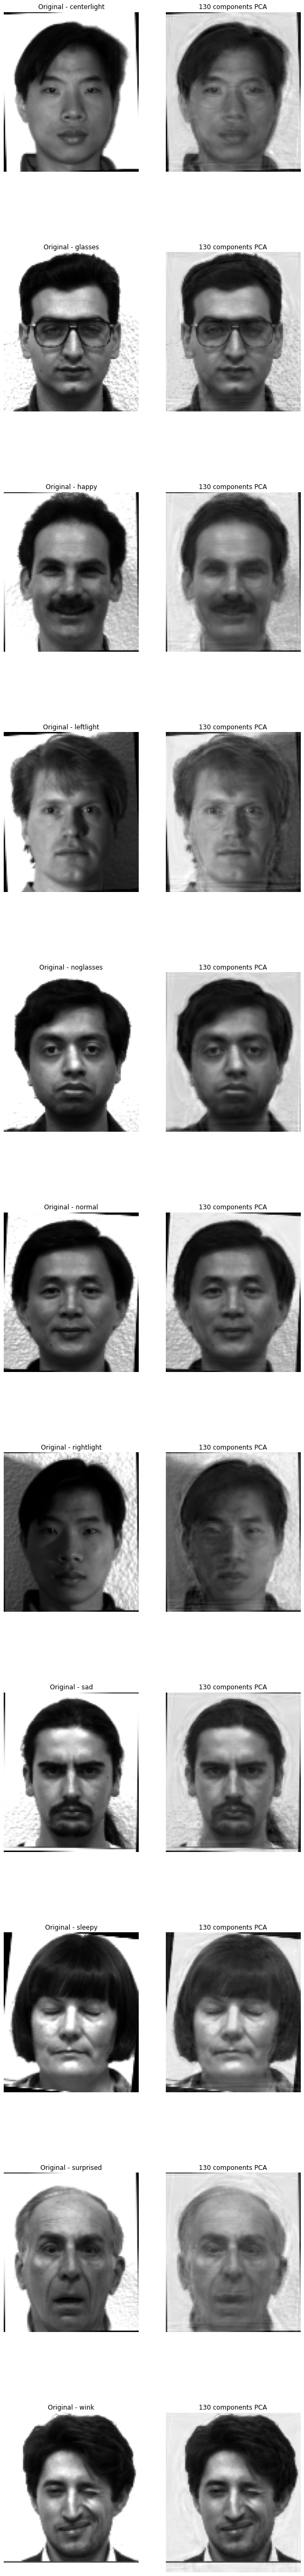

In [ ]:
fig, axs = plt.subplots(11,2)
fig.set_figheight(90)
fig.set_figwidth(10)
for i in range(11):
  target = np.random.choice(np.where(np.argmax(Y, axis=1) == i)[0])
  axs[i][0].grid('off')
  axs[i][0].axis('off')
  axs[i][1].grid('off')
  axs[i][1].axis('off')
  axs[i][0].set_title('Original - ' + states[i])
  axs[i][1].set_title('130 components PCA')
  axs[i][0].imshow(X[target], cmap='gray')
  axs[i][1].imshow(projected[target].reshape(116,98), cmap='gray')